<center> 
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Logo_Mondragon_Unibertsitatea.png" width="150" height="100" float ="left">
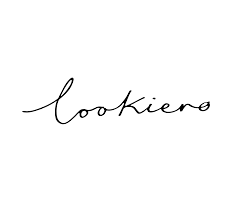    


---
<h3>Beñat Basabe, Jon Jarrín, June Pagaldai, Daniel Puente, Eneko Rentería | <font color='red'> Equipo Rojo<h3>

## Estadísticas de los grafos y looks
Se extraen todas las características de los grafos ya generados

### Carga de librerias 
---

- **General**

In [1]:
import pandas as pd
import numpy as np
import pickle

def guardar_pikle(df, name):
    with open(dir_out + str(name) + '.pkl', 'wb') as fp: pickle.dump(df, fp)

def abrir_pikle(name):
    with open(dir_out + str(name) + '.pkl', 'rb') as fp: df = pickle.load(fp)
    return df

In [2]:
import warnings
warnings.filterwarnings('ignore')

- **Pyspark**

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.functions import col
from pyspark.sql.functions import when

- **Strings**

In [4]:
from collections import Counter

- **Visualización**

In [5]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import matplotlib.pyplot as plt

* **Grafos**

In [6]:
import networkx as nx

- **Otros**

In [7]:
import itertools

## Funciones a utilizar
---

In [8]:
dir_in, dir_out = "../../datos/datos_originales/", "../../datos/datos_desarrollo/"

spark = SparkSession \
    .builder \
    .appName("how to read csv file") \
    .getOrCreate()

- Función para **dar nombre** a la variable **family_id** mediante la variable title

In [9]:
def get_family_name(id_):
    
    filtered = product.filter(product.family_id == id_)
    string = ' '.join([x['title'] for x in filtered.select('title').collect()]).lower()
    
    return id_, Counter(string.split()).most_common(1)[0][0]

- Función para crear los **sufijos** y facilitar el *join*

In [10]:
def rename_columns(df, suffix):
    ''' Renombra las columnas de un dataframe.'''
    for names in df.schema.names: df = df.withColumnRenamed(names,names + suffix)
    return df

* Función para conseguir valores únicos de una variable en *pyspark*

In [11]:
def get_value(dffs, variable):
    return list(dffs.select(dffs[variable]).distinct().toPandas()[variable])

### Looks
---

In [12]:
G7, G8, G9 = abrir_pikle('G7'), abrir_pikle('G8'), abrir_pikle('G9')

df_indices = pd.read_csv(dir_out + 'df_indices.csv')
df_indices['prenda'] = df_indices['0'].apply(lambda x: x.split('_')[0])

In [15]:
df_looks = pd.DataFrame()

In [16]:
df_looks['nivel_1'], df_looks['nivel_2'], df_looks['nivel_3'] = [], [], []

In [26]:
G7_looks = [['trench_garnet_L_7_classic_smooth_NOPREMIUM',
 'tshirt_white_L_7_casual_print_NOPREMIUM',
 'skirt_pink_L_7_classic_smooth_NOPREMIUM'],
 
['tshirt_khaki_L_7_boho.street_smooth_NOPREMIUM',
 'jeans_purple_L_7_casual.street_smooth_NOPREMIUM',
 'sweatshirt_greydark_L_7_casual.minimal_smooth_NOPREMIUM'],
 
['tshirt_ecru_L_7_casual.classic_smooth_NOPREMIUM',
 'pant_taupe_L_7_classic.minimal_smooth_NOPREMIUM' ,
 'cardigan_orange_L_7_boho.classic_smooth_NOPREMIUM'],
 
['top_black_L_7_classic.night_smooth_NOPREMIUM',
 'sweatshirt_orange_L_7_casual.street_smooth_NOPREMIUM',
 'pant_greenlight_L_7_boho.minimal_smooth_NOPREMIUM'],
 
['tshirt_khaki_L_7_casual.minimal_smooth_NOPREMIUM',
 'skirt_nude_L_7_boho.classic_print_NOPREMIUM' ,
 'sweatshirt_greydark_L_7_casual.minimal_smooth_NOPREMIUM' ]]

In [42]:
G8_looks = [['cardigan_red_M_8_boho_smooth_NOPREMIUM',
 'pant_black_M_8_minimal.street_smooth_NOPREMIUM',
 'skarf_white_UNQ_8_minimal_smooth_PREMIUM'],
 
['pant_grey_M_8_classic_print_NOPREMIUM' ,
 'sweater_graylight_M_8_boho_smooth_NOPREMIUM' ,
 'parka_bluedark_M_8_casual.street_smooth_NOPREMIUM'],
 
['pant_brown_M_8_night.street_smooth_NOPREMIUM',
 'tshirt_greenlight_M_8_casual.minimal_smooth_NOPREMIUM' ,
 'parka_greendark_M_8_casual.classic_smooth_NOPREMIUM'],
 
['jeans_black_M_8_casual.street_smooth_NOPREMIUM' ,
 'coat_rust_M_8_boho.classic_smooth_NOPREMIUM' ,
 'sweater_rust_M_8_casual.classic_smooth_NOPREMIUM' ],
 
['pant_black_M_8_classic.minimal.street_smooth_NOPREMIUM',
 'jacket_black_M_8_boho.street_print_NOPREMIUM' ,
 'tshirt_greendark_M_8_classic.minimal_smooth_NOPREMIUM' ]]

In [43]:
G9_looks = [['pant_white_S_9_casual.classic_smooth_NOPREMIUM' ,
 'sweater_yellow_XS_9_boho_print_NOPREMIUM' ,
 'jacket_purple_S_9_night_smooth_NOPREMIUM' ],
 
['jeans_ecru_XS_9_street_print_NOPREMIUM' ,
 'top_greenlight_XS_9_classic.minimal_smooth_NOPREMIUM' ,
 'cardigan_brownlight_S_9_boho.casual_smooth_NOPREMIUM'],
 
['jacket_white_S_9_classic_smooth_NOPREMIUM' ,
 'cardigan_pink_XS_9_boho.casual_print_NOPREMIUM',
 'jumpsuit_greendark_S_9_boho.casual_smooth_NOPREMIUM' ],
 
['jacket_black_S_9_classic_smooth_NOPREMIUM' ,
 'sweatshirt_black_S_9_casual_print_NOPREMIUM' ,
 'skirt_bluelight_S_9_casual.street_smooth_NOPREMIUM' ],

['short_black_S_9_casual.street_smooth_NOPREMIUM' ,
 'sweater_khaki_XS_9_minimal.street_print_NOPREMIUM' ,
 'jacket_purple_S_9_night_smooth_NOPREMIUM' ]]

In [45]:
looks_muestra = pd.DataFrame(G7_looks + G8_looks + G9_looks, columns=['nivel_1', 'nivel_2_3_A', 'nivel_2_3_B'])

In [47]:
looks_muestra.to_csv(dir_out + 'looks_muestra.csv', index=False)

In [15]:
for GRAPH in [G7, G8, G9]:
    ciclos = nx.cycle_basis(GRAPH)
    ciclos_3 = [x for x in ciclos if len(x) == 3]

    ciclos_3_fin = [x for x in ciclos_3 if ('1.1' in [GRAPH.nodes[x[0]]['level'], GRAPH.nodes[x[1]]['level'], GRAPH.nodes[x[2]]['level']]) | ('1.2' in [GRAPH.nodes[x[0]]['level'], GRAPH.nodes[x[1]]['level'], GRAPH.nodes[x[2]]['level']])]
    pesos = [np.median([GRAPH[x[0]][x[1]]['weight'],GRAPH[x[1]][x[2]]['weight'], GRAPH[x[2]][x[0]]['weight']])  for x in ciclos_3_fin]
    looks = sorted(zip(pesos, ciclos_3_fin), key=lambda x: -x[0])

    looks_array = np.array(looks)
    guardar_pikle(looks_array, 'looks_array_' + str(GRAPH.name))

In [47]:
for k, x in enumerate(np.random.choice(27249, size=16694, replace=False)):
    if len([p for p  in df_indices.iloc[looks[x][1]].values if 'dress' in p]) !=0:
        print('Look:', k + 1)
        print(df_indices.iloc[looks[x][1]].values)

Look: 33
[['tshirt_graylight_L_7_casual_smooth_NOPREMIUM' 'tshirt']
 ['dress_aubergine_L_7_casual.street_print_NOPREMIUM' 'dress']
 ['sweatshirt_greydark_L_7_casual.minimal_smooth_NOPREMIUM' 'sweatshirt']]
Look: 90
[['tshirt_yellow_L_7_casual_smooth_NOPREMIUM' 'tshirt']
 ['dress_grey_L_7_classic.minimal_smooth_NOPREMIUM' 'dress']
 ['sweatshirt_greydark_L_7_casual.minimal_smooth_NOPREMIUM' 'sweatshirt']]
Look: 121
[['top_pink_L_7_classic_print_NOPREMIUM' 'top']
 ['dress_greendark_L_7_boho_smooth_NOPREMIUM' 'dress']
 ['sweatshirt_greydark_L_7_casual.minimal_smooth_NOPREMIUM' 'sweatshirt']]
Look: 154
[['tshirt_yellow_L_7_boho.casual_print_NOPREMIUM' 'tshirt']
 ['dress_grey_L_7_casual.street_smooth_NOPREMIUM' 'dress']
 ['sweatshirt_greydark_L_7_casual.minimal_smooth_NOPREMIUM' 'sweatshirt']]
Look: 368
[['tshirt_green_L_7_street_smooth_NOPREMIUM' 'tshirt']
 ['dress_grey_L_7_casual.street_smooth_NOPREMIUM' 'dress']
 ['sweatshirt_greydark_L_7_casual.minimal_smooth_NOPREMIUM' 'sweatshirt']]
Lo

### Graph statitiscs
---

##### **Estadísticas básicas**

In [15]:
variables, count = [], 1
lista_grafos = [G7, G8, G9]
for x in lista_grafos:

    nodos = x.number_of_nodes() 
    aristas = x.number_of_edges()
    grados_medio = (x.number_of_edges() / x.number_of_nodes()) * 2
    isolated = len([n for n, d in x.degree() if d == 0])

    number_connected_components = nx.number_connected_components(x)

    pesos = list(map(lambda z: x[z[0]][z[1]]['weight'], x.edges()))

    
    variables.append([nodos, aristas, grados_medio, isolated, number_connected_components,  np.median(pesos)])
    print(count, '/', len(lista_grafos), end = '\r')
    count += 1
df_stats = pd.DataFrame(variables, columns = ['nodos', 'aristas', 'grado_medio', 'isolated', 'componentes_conectadas',  'weight_median'])

df_stats

,nodos,aristas,grado_medio,isolated,componentes_conectadas,weight_median
0,4232,724721,342.495747,190,197,0.9375
1,4737,1127449,476.018155,141,148,0.9375
2,4299,858332,399.317050,97,104,0.8750


##### **Node level features**

Important based

In [41]:
variables, count = [], 1
for x in lista_grafos:

    closeness = np.array(list(nx.closeness_centrality(x, wf_improved=False).values()))
    media_closeness, closeness_08 = np.median(closeness), len(closeness[closeness > 0.8])

    eigenvector = np.array(list(nx.eigenvector_centrality_numpy(x).values()))
    media_eigenvector, max_eigenvector = np.median(eigenvector), eigenvector.max()

    betweenness_centrality = np.array(list(nx.algorithms.centrality.betweenness_centrality(x).values()))
    media_betweenness, max_betweenness = np.median(betweenness_centrality), betweenness_centrality.max()

    page_rank = np.array(list(nx.pagerank(x).values()))
    media_page_rank, max_page_rank = np.median(page_rank), page_rank.max()

    variables.append([media_closeness, closeness_08, media_eigenvector, max_eigenvector, media_betweenness, max_betweenness, media_page_rank, max_page_rank])
    print(count, '/', len(lista_grafos), end = '\r')
    count += 1

    
df_stats_node_important_based = pd.DataFrame(variables, columns = ['Median  closeness', 'Closeness > 0.8', 'Median eigenvector', 'Max eigenvector', 'Median betweenness', 'Max betweenness', 'Median page rank', 'Max page rank'])
df_stats_node_important_based


,Median closeness,Closeness > 0.8,Median eigenvector,Max eigenvector,Median betweenness,Max betweenness,Median page rank,Max page rank
0,0.620234,89.0,0.008078,0.045149,0.000024,0.000133,0.000236,0.000420
1,0.649456,3.0,0.008139,0.033961,0.000021,0.000054,0.000211,0.000328
2,0.655720,27.0,0.008044,0.039703,0.000022,0.000067,0.000233,0.000385


Structure based

In [45]:
average_clustering = nx.average_clustering(G8)
triangles = nx.triangles(G8)

In [44]:
from networkx.algorithms.community.label_propagation import label_propagation_communities
import community as community_louvain

variables, count = [], 1
for x in lista_grafos:
    average_clustering = nx.average_clustering(x)
    triangles = nx.triangles(x)
    # np.max(list(triangles.values()))

    label_propagation = label_propagation_communities(x)
    label_propagation = list(map(lambda x: len(x), list(label_propagation)))

    communities =community_louvain.best_partition(x)
    variables.append([average_clustering, len([x for x in list(triangles.values()) if x > 0]), len(label_propagation), np.median(label_propagation), np.max(label_propagation), np.std(label_propagation), np.max(list(communities.values())) + 1])
    print(count, '/', len(lista_grafos), end = '\r')
    count += 1


df_stats_edge = pd.DataFrame(variables, columns = ['Average clustering', 'Triangles', 'Label propagation', 'Media label propagation', 'Max label propagation', 'Std label propagation', 'Max communities Louvain'])

,Average clustering,Triangles,Label propagation,Median label propagation,Max label propagation,Std label propagation,Max communities Louvain
0,0.385321,4042.0,197.0,21.482234,1255.0,127.260,197.0
1,0.418346,4596.0,148.0,32.006757,1540.0,171.480,148.0
2,0.433759,4202.0,104.0,41.336538,1251.0,177.358,104.0


##### **Edge level features**

Local

In [14]:
variables, count = [], 1
for x in lista_grafos:
    targets = nx.non_edges(x)
    common_neighbors = [(e[0], e[1], len(list(nx.common_neighbors(x, e[0], e[1])))) for e in targets]
    common_neighbors_mean = np.median(list(map(lambda x: x[2], common_neighbors)))
    common_neighbors_std = np.std(list(map(lambda x: x[2], common_neighbors)))

    jaccard_coefficients = list(nx.jaccard_coefficient(x))
    jaccard_coefficients_mean = np.median(list(map(lambda x: x[2], jaccard_coefficients)))
    jaccard_coefficients_std = np.std(list(map(lambda x: x[2], jaccard_coefficients)))

    adamic_adar_index = list(nx.adamic_adar_index(x))
    adamic_adar_index_mean = np.median(list(map(lambda x: x[2], adamic_adar_index)))
    adamic_adar_index_std = np.std(list(map(lambda x: x[2], adamic_adar_index)))

    variables.append([common_neighbors_mean, common_neighbors_std, jaccard_coefficients_mean, jaccard_coefficients_std, adamic_adar_index_mean, adamic_adar_index_std])
    print(count, '/', len(lista_grafos), end = '\r')
    count += 1

df_stats_edge = pd.DataFrame(variables, columns = ['Common neighbors Mean', 'Common neighbors Std', 'Jaccard Coefficients Mean', 'Jaccard Coefficients Std', 'Adamic Adar Index Mean', 'Adamic Adar Index Std'])
df_stats_edge

,Common neighbors Mean,Common neighbors Std,Jaccard Coefficients Mean,Jaccard Coefficients Std,Adamic Adar Index Mean,Adamic Adar Index Std
0,24.378181,82.311214,0.046231,0.151253,3.934180,13.189893
1,37.743597,122.036648,0.048981,0.154150,5.846665,18.632078
2,28.226622,95.582845,0.047656,0.157532,4.505891,15.095852


Global

In [17]:
lista_katz = [nx.algorithms.centrality.katz_centrality_numpy(x) for x in lista_grafos]
media, max, desviacion = [np.median(list(x.values())) for x in lista_katz], [np.max(list(x.values())) for x in lista_katz], [np.std(list(x.values())) for x in lista_katz]
df_stats_edge_global = pd.DataFrame()
df_stats_edge_global['Media Katz'], df_stats_edge_global['Max Katz'], df_stats_edge_global['Std Katz'] = media, max, desviacion

df_stats_edge_global

,Media Katz,Max Katz,Std Katz
0,0.000389,0.164242,0.015367
1,0.000223,0.350464,0.014528
2,0.000376,0.236720,0.015247


##### **Cliques y conjuntos independientes**

In [20]:
variables, count = [], 1
for x in lista_grafos:

    maximal_independent_set = nx.maximal_independent_set(x) 
    maximal_independent_set = len(maximal_independent_set)
    
    # H = G7.copy()
    # H.remove_nodes_from(list(nx.isolates(H)))
    # min_edge_cover = nx.algorithms.covering.min_edge_cover(H) # Da error

    
    find_cliques = list(nx.find_cliques(x))
    graph_number_of_cliques = [k for k in find_cliques if len(k) > 2]
    
    variables.append([maximal_independent_set, len(graph_number_of_cliques)])
    print(count, '/', len(lista_grafos), end = '\r')
    count += 1

df_stats_edge = pd.DataFrame(variables, columns = ['Maximal independent set', 'Number of cliques'])
df_stats_edge

In [167]:
H = G9.copy()
H.remove_nodes_from(list(nx.isolates(H)))

find_cliques = list(nx.find_cliques(H))
graph_number_of_cliques = [k for k in find_cliques if len(k) > 2]
cliques, primeros = np.unique([x[0] for x in find_cliques]), [x[0] for x in find_cliques]

##### **Caminos**

In [18]:
variables, count = [], 1
for x in lista_grafos:
    anchura, camino_largo = [], []
     
    shortest = nx.shortest_path(x, weight='weight')
    for k in x.nodes():
        camino_largo.append(np.max([len(v) for v in shortest[k].values()]))
        
        H = nx.algorithms.traversal.breadth_first_search.bfs_tree(x, k)
        anchura.append(len(dict(nx.bfs_predecessors(H, k))))
        
    print(np.max(camino_largo))
    arbol_expansion_minimo = nx.minimum_spanning_tree(x)
    arbol_expansion_minimo = len(arbol_expansion_minimo.edges())

    variables.append([np.max(anchura), np.max(camino_largo), arbol_expansion_minimo])
    print(count, '/', len(lista_grafos), end = '\r')
    count += 1
    
df_stats_edge = pd.DataFrame(variables, columns = ['Max Anchura', 'Max Camino Largo', 'Arbol Expansion Minimo'])
df_stats_edge

4
3 / 3
4 / 3


,Max Anchura,Max Camino Largo,Arbol Expansion Minimo
0,1254,4,4035
1,1539,3,4589
2,1250,4,4195


##### **Graphs**

In [1]:
from grakel.kernels import ShortestPath, WeisfeilerLehman, GraphletSampling, WeisfeilerLehmanOptimalAssignment
from grakel.datasets import fetch_dataset
import networkx as nx
import pickle
import grakel
import numpy as np
import matplotlib.pyplot as plt

dir_in, dir_out = "../../datos/datos_originales/", "../../datos/datos_desarrollo/"
def guardar_pikle(df, name):
    with open(dir_out + str(name) + '.pkl', 'wb') as fp: pickle.dump(df, fp)

def abrir_pikle(name):
    with open(dir_out + str(name) + '.pkl', 'rb') as fp: df = pickle.load(fp)
    return df
    
G7, G8, G9 = abrir_pikle('G7'), abrir_pikle('G8'), abrir_pikle('G9')
lista_grafos = [G7, G8, G9]

modelWeisfeiler, modelShortest, modelGraphlet, WeisfeilerLehmanOptimal = WeisfeilerLehman(), ShortestPath(), GraphletSampling(), WeisfeilerLehmanOptimalAssignment()
for x in lista_grafos:
    for k in x.nodes: x.nodes[k]['common_label'] = 1

In [2]:
Grakel = grakel.graph_from_networkx(lista_grafos, node_labels_tag='common_label', edge_labels_tag='weight')
similarity_matrix = WeisfeilerLehmanOptimal.fit_transform(Grakel)

In [8]:
ejes = [x.name for x in lista_grafos]
paleta = ['#264653','#2A9D8F','#85CAC2','#DFF6F4' ,'#E9C46A','#F4A261','#E76F51','#C53D1B', '#7E2711']

def comparar_grafos(grafo):
    
    indices = ejes.index(grafo)
    primera_fila = np.round(similarity_matrix[indices]/similarity_matrix[indices][indices] * 100, 3)
    colores = ['#E76F51' if x == primera_fila.min() else '#264653' for x in primera_fila]
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.bar(ejes, primera_fila, color = colores)

    ax.set_title(f'% Similitud grafos respecto a {grafo}', color = 'k', weight = 'bold', fontsize = 15)
    ax.set_xlabel('Grafos', color = 'k', weight = 'bold', fontsize = 15) 
    ax.set_ylabel('Similitud', color = 'k', weight = 'bold', fontsize = 15)

    plt.yticks(rotation=90)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=15)
    fig.show()

C:\Users\Daniel\anaconda3\envs\graph_grakel\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


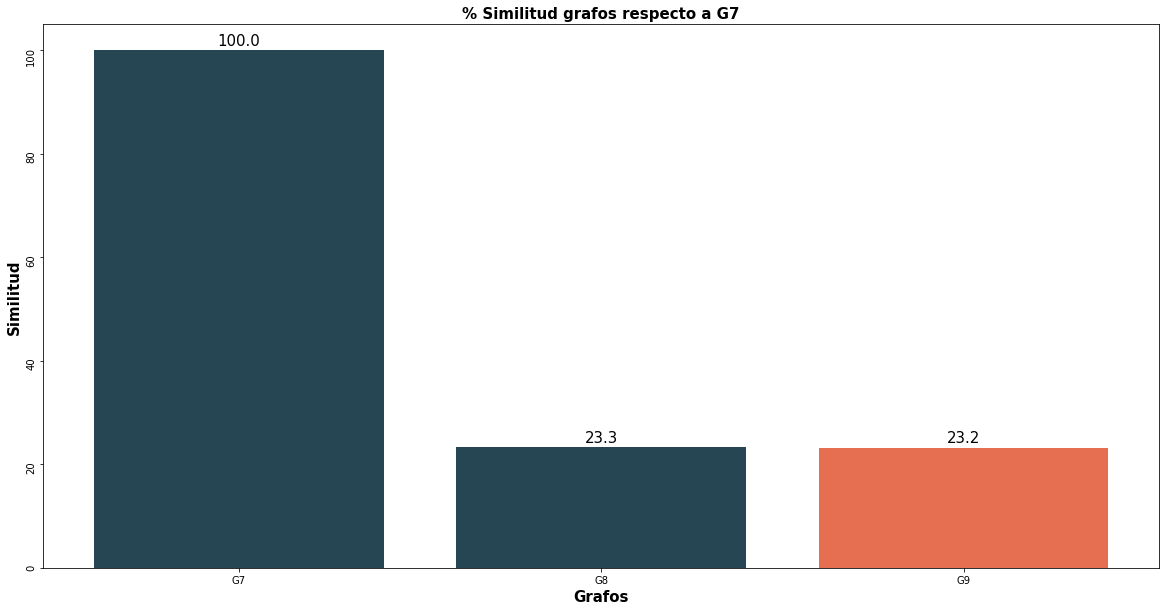

In [11]:
comparar_grafos('G7')